# project2：Iris数据集掌握classification

#### 一、先认识你的"学习对象"——鸢尾花数据集  

- **第一步：打开盒子看结构**  
  你需要先知道：  
  - 数据有多少行（样本数）？多少列（特征数）？  
  - 特征是数值型还是类别型？目标变量（花的品种）如何编码？  
  - 有没有缺失值？数据分布是否均匀？  
 


In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# 加载数据集
iris = load_iris()
x = iris.data
y = iris.target
feature_names = iris.feature_names

# 查看数据结构（思考：data 和 target 分别是什么？）
print("特征数据描述：", iris.DESCR)
print("特征形状：", x.shape)       
print("目标值形状：", y.shape)  

特征数据描述： .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 clas

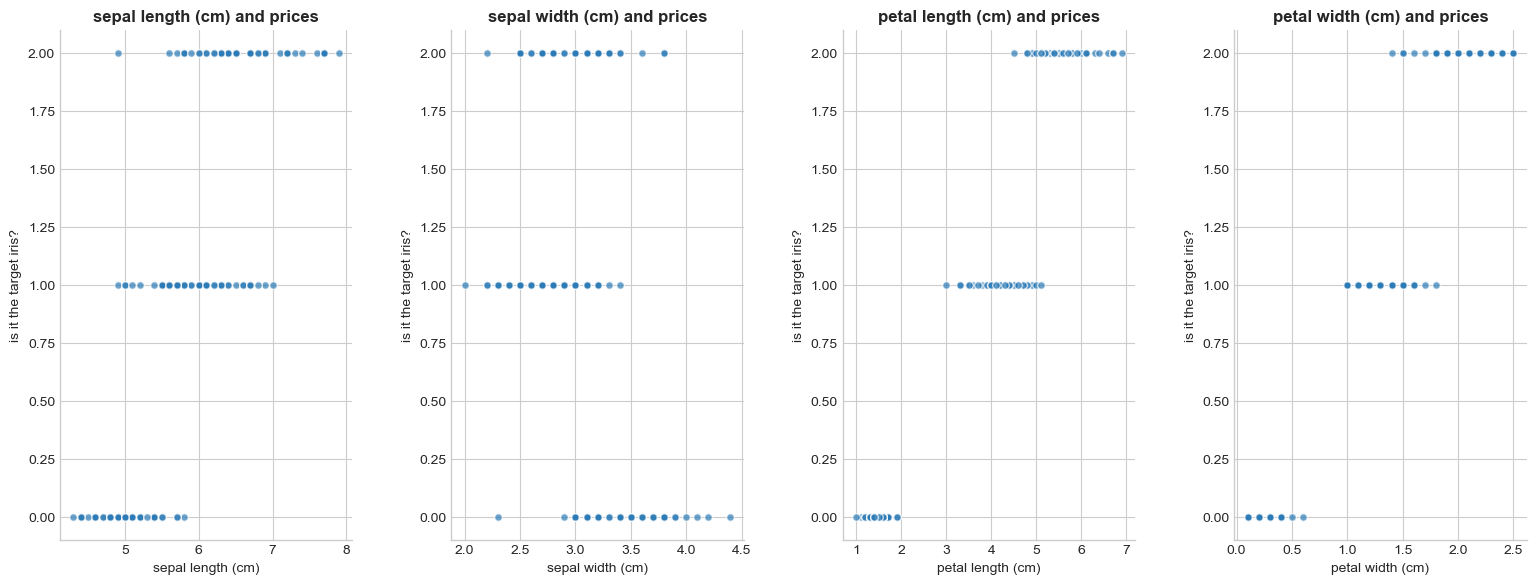

In [2]:
plt.style.use("seaborn-v0_8-whitegrid")  
plt.figure(figsize=(16, 12))

for i in range(x.shape[1]):
    plt.subplot(2, 4, i+1)
    plt.scatter(x[:, i], y, alpha=0.7, s=30, color="#2c7bb6", edgecolor="white")
    plt.title(f"{feature_names[i]} and prices", fontweight="bold", fontsize=12)
    plt.xlabel(feature_names[i], fontsize=10)
    plt.ylabel("is it the target iris?", fontsize=10)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.tight_layout(pad=3)

plt.show()



#### 二、把三分类简化成二分类：如何选"对手"？  
**思考2：三分类问题怎么变成二分类？**  
鸢尾花有3个品种，你可以任选两个品种作为二分类的目标，比如：  
- 山鸢尾（类别0）vs 变色鸢尾（类别1）  
- 山鸢尾 vs 维吉尼亚鸢尾  
- 变色鸢尾 vs 维吉尼亚鸢尾  

- **我们以山鸢尾（类别0）和变色鸢尾（类别1）为例：**

In [3]:
# 类别0和类别1，确保二分类
x = iris.data[:100]
y = iris.target[:100]

#### 三、建立二分类模型：
1. **逻辑回归（Logistic Regression）**  
   - 思路：用一个函数把特征组合成一个概率值（比如：属于A品种的概率>0.5就判为A）。  
   - 思考：逻辑回归的决策边界是直线还是曲线？当特征之间有复杂关系时，它能准确分类吗？
   - 建议：先不使用scihit_learn中logisticRegression 

In [4]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """

    g = 1/(1+np.exp(-z))
   
    return g

- 先初始化一下w和b

In [5]:
w = np.zeros(x.shape[1])
b = 0

#### 五、模型评估：怎么知道分类准不准？  
**思考5：如何判断模型有没有"学明白"？**  
- 构建二分类的cost function 
  

In [6]:
def compute_cost_logistic(x, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """

    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(x[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    cost = cost / m
    return cost

- 梯度下降

In [7]:
def compute_gradient_logistic(X, y, w, b): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw

- 训练的函数

In [8]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

    return w, b, J_history         #return final w,b and J history for graphing


- 开始训练并展示cost function vs iteration

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_86296\1164482548.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


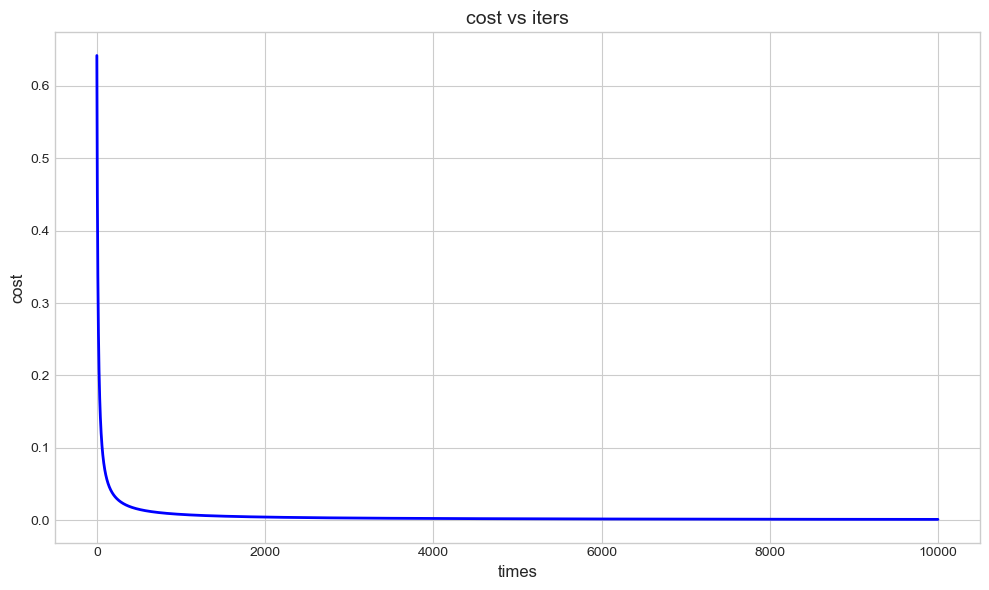


最终结果:
w = [-0.82584214 -3.01585563  4.63884523  2.10063684]
b = -0.5262
最终代价 = 0.000972
训练集准确率: 100.00%


In [10]:
alph = 0.1
iters = 10000


w_out, b_out, J_history = gradient_descent(x, y, w, b, alph, iters) 

# 绘制代价函数随迭代次数的变化曲线
plt.figure(figsize=(10, 6))
plt.plot(range(len(J_history)), J_history, 'b-', linewidth=2)
plt.title('cost vs iters', fontsize=14)
plt.xlabel('times', fontsize=12)
plt.ylabel('cost', fontsize=12)
plt.grid(True)

plt.legend()
plt.tight_layout()
plt.show()

# 输出最终结果
print("\n最终结果:")
print(f"w = {w_out}")
print(f"b = {b_out:.4f}")
print(f"最终代价 = {J_history[-1]:.6f}")

# 计算准确率
def predict(X, w, b, threshold=0.5):
    m = X.shape[0]
    predictions = np.zeros(m)
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        predictions[i] = 1 if f_wb_i >= threshold else 0
    return predictions

y_pred = predict(x, w_out, b_out)
accuracy = np.mean(y_pred == y) * 100
print(f"训练集准确率: {accuracy:.2f}%")

#### 六、进阶思考：如何让模型更聪明？  
**思考6：如果分类效果不好，怎么优化？**  
假设你的模型准确率只有70%，可以尝试：  
- **特征工程**：  
  - 有没有可能把两个特征组合成新特征？比如"花瓣长宽比"是否比单独的长度、宽度更有用？  
  - 是否需要对特征做标准化（比如让所有特征的均值为0，标准差为1）？为什么KNN模型可能更需要标准化？  
- **模型调参**：  
  - 逻辑回归：正则化参数（如L1/L2正则）如何影响模型复杂度？  
  - KNN：距离度量方式选欧氏距离还是曼哈顿距离？  
- **可视化决策边界**：  
  用`matplotlib`画出模型的分类边界，看看哪里分错了，为什么？

#### 七、最后一个灵魂拷问：二分类的本质是什么？  
当你用鸢尾花数据做完所有实验后，可以想想：  
- 二分类模型其实是在寻找一个"分界线"，把特征空间分成两部分，对吗？  
- 不同模型的"分界线"有什么区别（比如逻辑回归是直线，决策树是分段直线，KNN是根据样本分布动态变化的）？  
- 现实中的二分类问题（比如垃圾邮件识别、疾病预测）和鸢尾花分类有什么异同？  


**记住**：学习的重点不是套代码，而是理解每个步骤背后的逻辑——就像你要区分两种花，会先观察它们的差异，再总结规律，最后用规律去判断新的花。模型只是把这个过程用数学语言实现而已~